In [4]:
import pandas as pd

In [5]:
df = pd.read_csv("data.csv")

In [6]:
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [7]:
!pip install scikit-learn

In [8]:
import sklearn

In [9]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

numerical_features = [
    "valence", "danceability", "energy", "tempo",
    "acousticness", "liveness", "speechiness", "instrumentalness"
]

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[numerical_features]), columns=numerical_features)

df_scaled.head()

,valence,danceability,energy,tempo,acousticness,liveness,speechiness,instrumentalness
0,-1.782825,-1.467013,-1.013988,-1.169307,1.276187,2.626719,-0.379706,2.268102
1,1.650688,1.598779,-0.528270,-1.821180,0.611347,-0.262229,1.945481,-0.532771
2,-1.858821,-1.188820,-1.182122,-0.212404,1.220340,-0.599749,-0.396297,2.379754
3,-1.381564,-1.489722,-0.647832,-0.545537,1.236296,1.002043,-0.387080,-0.532682
4,-1.047180,-0.677855,-1.081242,-0.494867,1.209703,0.132499,-0.371104,-0.532765


In [10]:
!pip install matplotlib

In [11]:
import sys
!{sys.executable} -m pip install matplotlib

In [12]:
import matplotlib

In [13]:
from sklearn.model_selection import train_test_split

train_data,test_data= train_test_split(df_scaled,test_size=0.2,random_state=42)

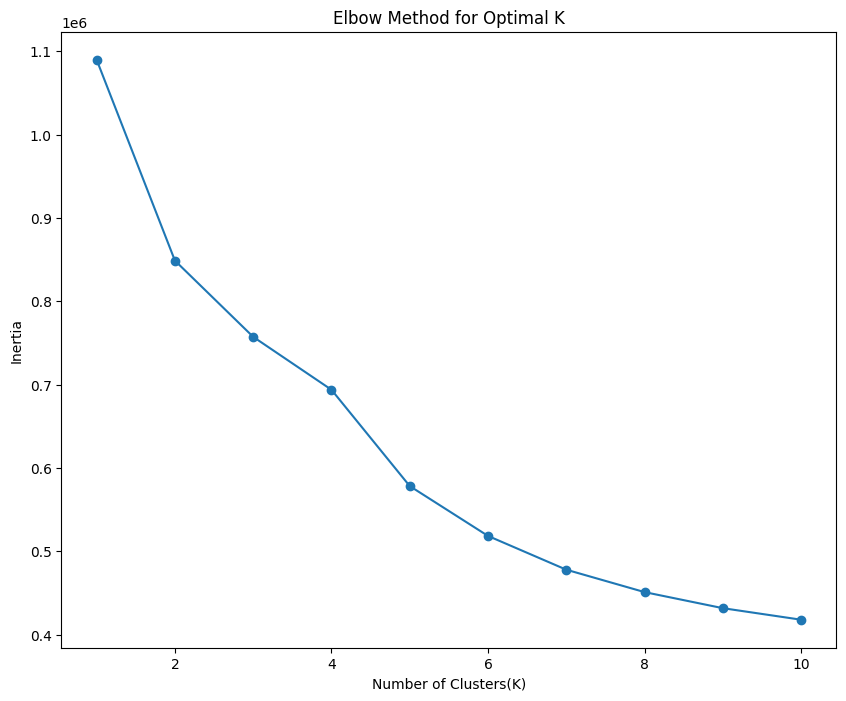

In [14]:
#Elbow method (to find optimal K)
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia=[]
k_values= range(1,11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(train_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10,8))
plt.plot(k_values, inertia, marker='o')
plt.xlabel("Number of Clusters(K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()

In [15]:
optimal_k=5
Kmeans= KMeans(n_clusters=optimal_k, random_state=42)
df["cluster"] =Kmeans.fit_predict(df_scaled)

In [16]:
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,cluster
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954,1
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936,2
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339,1
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109,0
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665,0


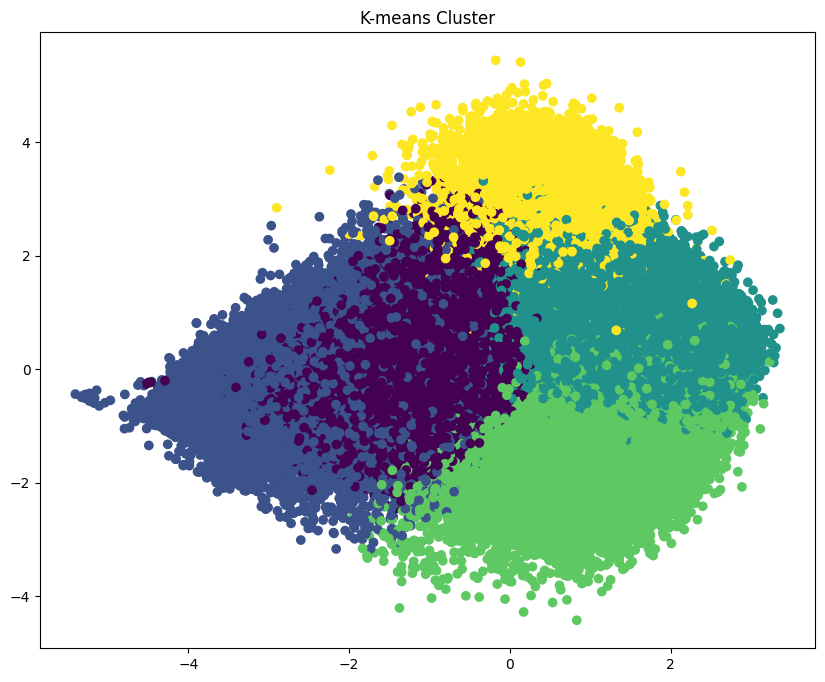

In [17]:
from sklearn.decomposition import PCA
pca= PCA(n_components=2)

pca_result= pca.fit_transform(df_scaled)


plt.figure(figsize=(10,8))
plt.scatter(pca_result[:,0],pca_result[:, 1], c=df['cluster'], cmap = 'viridis')
plt.title("K-means Cluster")
plt.show()

In [18]:
from sklearn.cluster import KMeans

# Fit KMeans (choose K as per elbow method, here example K=5)
kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(df_scaled)

In [19]:
def recommend_songs(song_name, df, num_recommendations=5):
    # First, let's check what columns are actually in the dataframe
    # Uncomment the next line to see all column names
    # print(df.columns.tolist())

    # Assuming the correct column name is 'name' or 'title' instead of 'song_name'
    # Replace 'name' with whatever the actual column name is in your dataframe
    song_column = 'name'  # Change this to match your actual column name

    # First check if the song exists in the dataset
    if song_name not in df[song_column].values:
        print(f"'{song_name}' not found in the dataset. Please check the spelling or try another song.")
        return []

    # Get the index of the song
    song_idx = df[df[song_column] == song_name].index[0]

    # Make sure the index is within bounds
    if song_idx >= len(df):
        print(f"Song index {song_idx} is out of bounds for dataframe with {len(df)} rows.")
        return []

    # Rest of your recommendation logic
    # ...

    # Return recommendations
    # This is a placeholder - your actual implementation will differ
    similar_songs = df.sample(num_recommendations)[song_column].tolist()
    return similar_songs

input_song = "Camby Bolongo"
recommended_songs = recommend_songs(input_song, df, num_recommendations=5)

print(f"Songs similar to '{input_song}':")
print(recommended_songs)

Songs similar to 'Camby Bolongo':
['Aaj Phir Jeene Ki Tamanna Hai', 'Someday My Prince Will Come', 'Don Giovanni, K. 527 (Excerpts): Là ci darem la mano', 'Send in the Clowns', 'Schumann: Symphony No. 4 in D Minor, Op. 120: III. Scherzo. Lebhaft - Etwas zurückhaltend']


In [20]:
from sklearn.metrics.pairwise import cosine_similarity

def recommended_songs(song_name, num_recommendations=5):
    global df

    song_column = 'name'
    numerical_features = [
        "valence", "danceability", "energy", "tempo",
        "acousticness", "liveness", "speechiness", "instrumentalness"
    ]

    # 1. Validate
    if song_name not in df[song_column].values:
        return f"❌ '{song_name}' not found in the dataset."

    if 'cluster' not in df.columns:
        return "❌ 'cluster' column not found in dataset."

    for col in numerical_features:
        if col not in df.columns:
            return f"❌ Column '{col}' not found in dataset."

    try:
        # 2. Filter only songs in same cluster
        song_cluster = df.loc[df[song_column] == song_name, 'cluster'].iloc[0]
        same_cluster_songs = df[df['cluster'] == song_cluster].reset_index(drop=True)

        # 3. Features of all songs in this cluster
        cluster_features = same_cluster_songs[numerical_features]

        # 4. Get the vector of the input song
        song_vector = cluster_features[same_cluster_songs[song_column] == song_name]

        # 5. Compute similarity of this song vs all others
        similarity_scores = cosine_similarity(song_vector, cluster_features)[0]

        # 6. Get top recommendations
        same_cluster_songs['similarity'] = similarity_scores
        recommendations = (
            same_cluster_songs[same_cluster_songs[song_column] != song_name]  # exclude input song
            .sort_values(by='similarity', ascending=False)
            .head(num_recommendations)[['name', 'artists', 'year']]
        )

        return recommendations.values.tolist()

    except Exception as e:
        return f"⚠️ Error: {str(e)}"


In [21]:
df.to_csv("Clustered_df.csv")

In [22]:
!pip install gradio

In [23]:
import sys

In [24]:
import gradio as gr

interface = gr.Interface(
    fn=recommended_songs,
    inputs=[
        gr.Textbox(label="Enter a Song Name"),
        gr.Slider(1, 10, value=5, step=1, label="Number of Recommendations")
    ],
    outputs=gr.DataFrame(),
    title="Music Recommendation System",
    description="Enter a song name to get similar song recommendations."
)

In [25]:
interface.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://17f521b4433e4210e2.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [26]:
print(recommended_songs("Camby Bolongo", 5))

[['Bitch to the Boys', "['Shakatak']", 1982], ['Spoonful', "['Willie Dixon']", 1947], ['A Fifth Of Beethoven', "['Walter Murphy']", 1977], ['A Fifth Of Beethoven', "['Walter Murphy']", 1977], ['Oh, Pretty Woman', "['Albert King']", 1967]]


In [27]:
print(df.columns.tolist())

['valence', 'year', 'acousticness', 'artists', 'danceability', 'duration_ms', 'energy', 'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'name', 'popularity', 'release_date', 'speechiness', 'tempo', 'cluster']
